This homework is the second part of the homework serie using the .csv which summarizes the contributions received by a selective private liberal arts college in the Midwest. The college has a large endowment and, as all private colleges do, keeps detailed records on alumni donations. Here we analyze the contributions of ﬁve graduating classes (the cohorts who have graduated in 1957, 1967, 1977, 1987, and 1997). The data set consists of n = 1230 living alumni and contains their contributions for the years 2000 – 2004.

This time, we will try to draw descriptive statistics regarding the dataset.

In [1]:
#データ
大学基金 <- read.csv("宿題.csv", header=TRUE, sep=",")

In [2]:
head(大学基金)

Gender,Class.Year,Marital.Status,Major,Next.Degree,FY04Giving,FY03Giving,FY02Giving,FY01Giving,FY00Giving,AttendenceEvent
M,1957,M,History,LLB,2500,2500,1400,12060,12000,1
M,1957,M,Physics,MS,5000,5000,5000,5000,10000,1
F,1957,M,Music,NONE,5000,5000,5000,5000,10000,1
M,1957,M,History,NONE,0,5100,200,200,0,1
M,1957,M,Biology,MD,1000,1000,1000,1005,1000,1
F,1957,M,Mathematics,NONE,0,0,0,0,0,0


The above functions give us a quick reminder regarding the composition of our dataframe. We need to define variables which may simplify our task.

In [3]:
#変数
年 <- 大学基金$Class.Year
unique(年)
cat(paste('We have ', nlevels(factor(年)), ' unique years.'))

[1] 1957 1967 1977 1987 1997

We have  5  unique years.

We are looking for the total contribution of each graduate for FY00, FY01, ... , FY04. To do so we need to some each FY column for each row. It gives us the following :

In [4]:
#全基金
大学基金$学生基金 <- rowSums(大学基金[,c("FY00Giving","FY01Giving","FY02Giving","FY03Giving","FY04Giving")])
summary(大学基金$学生基金)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      75     980     400  171870 

Our extreme values are <b>0-171870</b>, with a median value positioned at <b>75</b>, our mean is <b>980</b>. Our quantile are the following : 1st(0), 3rd(400).

Now we want the mean for each graduate contribution.

In [5]:
#平均学生基金

大学基金$平均基金 <- rowMeans (大学基金[,c("FY00Giving","FY01Giving","FY02Giving","FY03Giving","FY04Giving")])
summary(大学基金$平均基金)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      15     196      80   34374 

For mean, we have our lowest mean at <b>0</b> and our max mean at <b>34374</b>.

Now we want the standard deviation for each graduate contribution.

In [6]:
#標準偏差学生基金

大学基金$標準偏差 <- apply(大学基金[,6:10],1,sd)
summary(大学基金$標準偏差)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     0.00    11.18   178.73    44.72 71025.85 

For standard deviation, we have our lowest SD at <b>0</b> and our max SD at <b>71025.85</b>.

As for percentiles, we have the following :

In [7]:
#分位数 -> tried quantile$大学基金 <- apply(大学基金[,6:10], 1, quantile, probs=c(.25), na.rm=TRUE) did not work

分位数学生基金 <- quantile(大学基金$学生基金)
print(分位数学生基金)

      0%      25%      50%      75%     100% 
     0.0      0.0     75.0    400.0 171870.1 


0% = <b>0</b>, 25% = <b>0</b>, 50% = <b>75.0</b>, 50% = <b>75.0</b>, 75% = <b>400.0</b>, 100% = <b>171870.1</b>

In [8]:
summary(分位数学生基金)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0      75   34469     400  171870 

Since I was not sure regarding the instructions, I did the graphs for both each graduate YEAR and each graduate

In [9]:
#全基金
一組 <- 大学基金[ which(年=="1957"),]
二組 <- 大学基金[ which(年=="1967"),]
三組 <- 大学基金 [ which(年=="1977"),]
四組 <- 大学基金 [ which(年=="1987"),]
五組 <- 大学基金[ which(年=="1997"),]
一組金 <- sum(一組$FY00Giving, 一組$FY01Giving, 一組$FY02Giving, 一組$FY03Giving, 一組$FY04Giving)
二組金 <- sum(二組$FY00Giving, 二組$FY01Giving, 二組$FY02Giving, 二組$FY03Giving, 二組$FY04Giving)
三組金 <- sum(三組$FY00Giving, 三組$FY01Giving, 三組$FY02Giving, 三組$FY03Giving, 三組$FY04Giving)
四組金 <- sum(四組$FY00Giving, 四組$FY01Giving, 四組$FY02Giving, 四組$FY03Giving, 四組$FY04Giving)
五組金 <- sum(五組$FY00Giving, 五組$FY01Giving, 五組$FY02Giving, 五組$FY03Giving, 五組$FY04Giving)

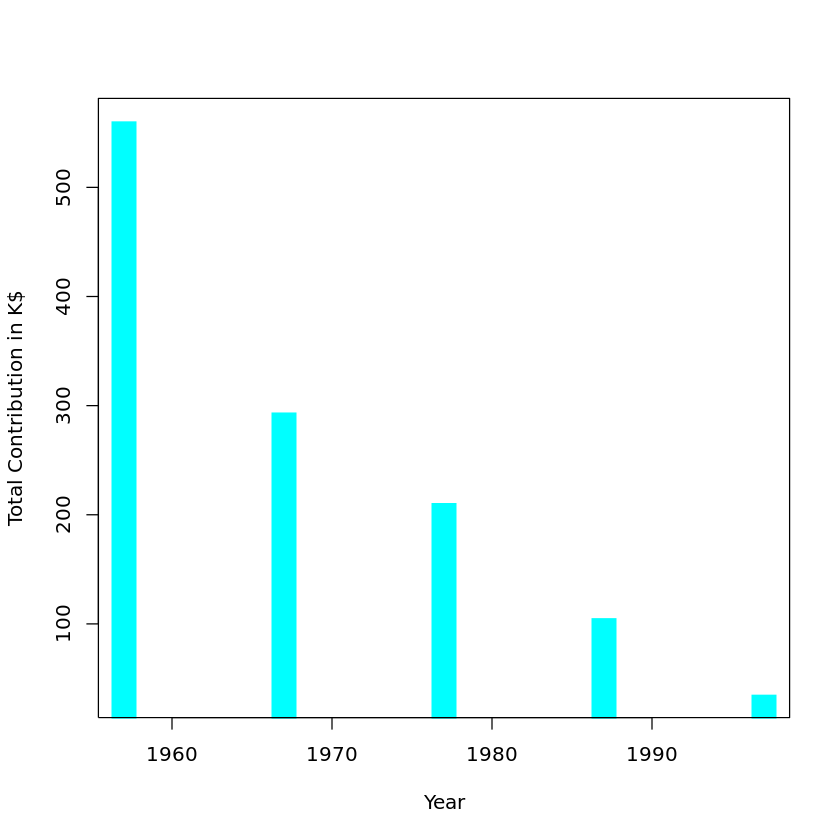

In [10]:
#プロット図
全金 <- c(一組金, 二組金, 三組金, 四組金, 五組金)
plot(y = 全金/1000, x=c('1957', '1967', '1977', '1987', '1997'),  col = "cyan", xlab= "Year", ylab = 'Total Contribution in K$',type = "h", lwd = 20, lend=1)

(Already commented in the homework 1) - We can see in the above graph that the oldest classes gave us a largest amount of money compared to the more recent one. It makes sense since they would work for longer and have more opportunities to donate money.

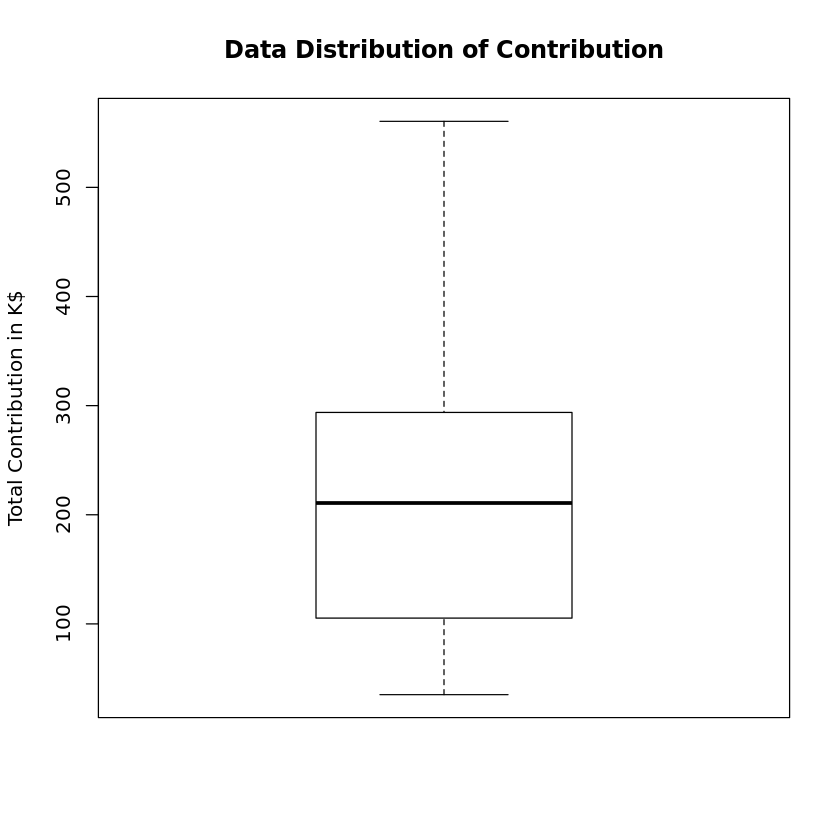

In [11]:
boxplot(全金/1000, outline=T, horizontal=F, main="Data Distribution of Contribution", ylab="Total Contribution in K$")

In the above graph, we can see there are no outliers (more/less times higher/lower than 3/2 quantile). We can also see that the minimum is <b>below 100k</b>, the lower quartile is near <b>100k</b>, the median value is near <b>200k</b>, the upper quartile is near <b>300k</b>. Finally the maximum is above <b>500k</b>.

This implies for the company that most contributions of 200kish$ are the norm.

Now we are analyzing the data for each student contribution :

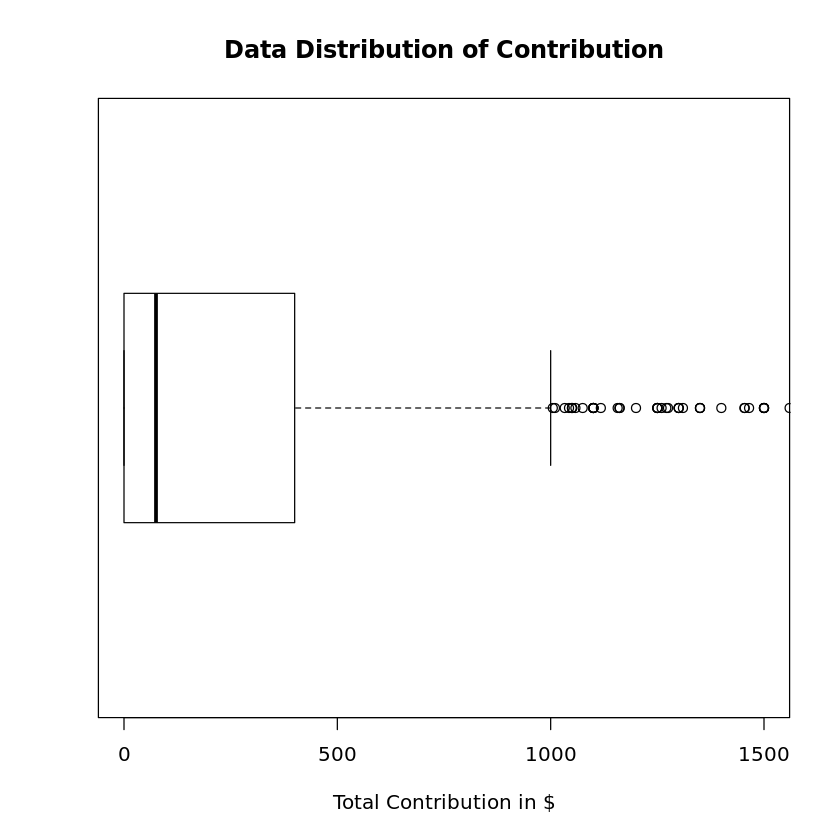

In [12]:
boxplot(大学基金$学生基金, outline=T, horizontal=T, main="Data Distribution of Contribution", ylim = c(0, 1500), xlab = "Total Contribution in $")

In the above graph, we can see there are (more/less times higher/lower than 3/2 quantile). We can also see that the minimum is <b>0</b>, the lower quartile is <b>0</b>, the median value is near <b>100</b>, the upper quartile is near <b>400</b>. Finally the maximum excluding outliers is above <b>1000</b>.

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”

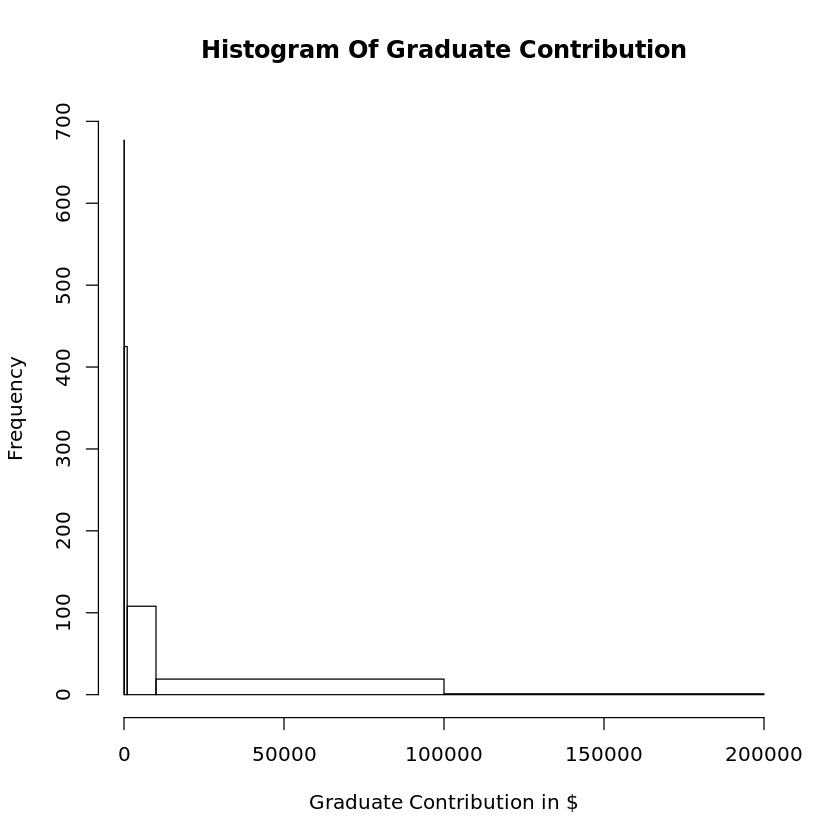

In [13]:
hist(大学基金$学生基金, freq=TRUE, breaks=c(0,100,1000,10000,100000,200000), ylim=c(0, 700), main="Histogram Of Graduate Contribution", xlab="Graduate Contribution in $")

The frequency histogram shows us that lot of people do not donate anything, and most people donating, donate less than 50000$, people donating above 50k$ have a total frequency < 50 

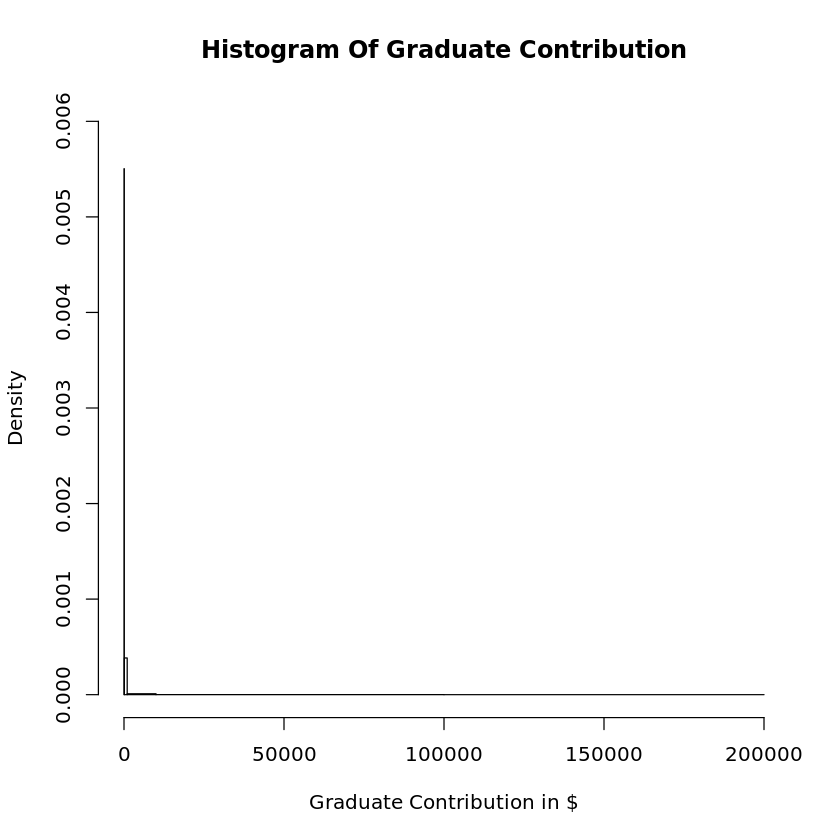

In [14]:
hist(大学基金$学生基金, freq=F, breaks=c(0,100,1000,10000,100000,200000), ylim=c(0, 0.006),main="Histogram Of Graduate Contribution", xlab="Graduate Contribution in $")

The density hist confirms what we just wrote above and highly emphasizes it.

From all of this, we can confidently say that for individual donation, for 2000-2004, most people do not donate at all or a small amount. The range between minimum and maximum are extremes with [0:170000] rounded. The median being at <b>75</b> for people donation vs a mean of <b>980</b> shows that this extreme discrepancy in our data affects the statistics. The individual mean in "mean" and "standard deviation" shows us that for most people their donation overtime (FY00,(...),FY04) does not change very much.